____
____
# Python KNN Regression - Revenue
____
____

____
## Imports and Setup
____

** Import modules **

Watched this tutorial
https://www.youtube.com/watch?v=bYM09nTVbk0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests

sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, r2_score

** Import data **

In [2]:
# Web scraper for getting price index data from US Bureau of Economic Analysis

# Import modules
import requests
import pandas as pd

# Initial variables
dates = []
values = []

# Getting data from Bureau of Economic Analysis API
url = "https://apps.bea.gov/api/data"
parameters = {
    "UserID": "90974B6B-A7A5-4CBF-A6F9-E553BEEB0B25",
    "method": "getdata",
    "datasetname": "NIPA",
    "ResultFormat": "JSON",
    "Frequency": "Q",
    "TableName": "T10104",
    "Year": "ALL"
}

response = requests.get(url=url, params=parameters)
response.raise_for_status()
data = response.json()["BEAAPI"]["Results"]["Data"]

for d in data:
    if d["LineDescription"] == "Gross domestic product":
        quarter = d["TimePeriod"][-1]
        month = 0

        if quarter == "1":
            month = 1
        elif quarter == "2":
            month = 4
        elif quarter == "3":
            month = 7
        elif quarter == "4":
            month = 10

        for x in range(3):
            date = str(month) + "/1/" + d["TimePeriod"][0:4]
            dates.append(date)
            values.append(float(d["DataValue"]))
            month += 1

# Make price index dictionary, assign to a DataFrame, convert to csv
data_dict = {
    "Date": dates,
    "Price_Index_Value": values
}

df_price_index = pd.DataFrame(data_dict)

In [3]:
# Web scraper for getting GDP data from US Bureau of Economic Analysis

# Import modules
import requests
import pandas as pd

# Initial variables
dates = []
values = []

# Getting data from Bureau of Economic Analysis API, 1 year at a time
url = "https://apps.bea.gov/api/data"
parameters = {
    "UserID": "90974B6B-A7A5-4CBF-A6F9-E553BEEB0B25",
    "method": "getdata",
    "datasetname": "GDPByIndustry",
    "ResultFormat": "JSON",
    "Frequency": "Q",
    "Industry": "ALL",
    "TableID": "1",
    "Year": "ALL"
}

response = requests.get(url=url, params=parameters)
response.raise_for_status()
data = response.json()["BEAAPI"]["Results"][0]["Data"]

for d in data:
    if d["IndustrYDescription"] == "Gross domestic product":
        quarter = d["Quarter"]
        month = 0

        if quarter == "I":
            month = 1
        elif quarter == "II":
            month = 4
        elif quarter == "III":
            month = 7
        elif quarter == "IV":
            month = 10

        for x in range(3):
            date = str(month) + "/1/" + d["Year"]
            dates.append(date)
            values.append(float(d["DataValue"]))
            month += 1

# Make GDP dictionary, assign to a DataFrame, convert to csv
data_dict = {
    "Date": dates,
    "GDP_Value": values
}

df_gdp = pd.DataFrame(data_dict)

In [4]:
# Web scraper for getting monthly gas prices from U.S. Energy Information Administration

# Import modules
import requests
import pandas as pd

# Initial variables
dates = []
values = []

# Getting data from U.S. Energy Information Administration
url = "https://api.eia.gov/v2/petroleum/pri/gnd/data/?frequency=monthly&data[0]=value&facets[product][]=EPM0&facets[duoarea][]=NUS&start=1990-08&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key=Bdgf7N1rGlQoLjcn00cdRrll3eM11ohy2I3TTJvE"
response = requests.get(url=url)
response.raise_for_status()
data = response.json()["response"]["data"]

for d in data:
    month = str(int(d["period"][-2::]))
    year = str(int(d["period"][0:4]))
    date = month + "/1/" + year
    dates.append(date)
    values.append(float(d["value"]))


# Make gas prices dictionary, assign to a DataFrame, convert to csv
data_dict = {
    "Date": dates,
    "Gas_Price_Value": values
}

df_gas = pd.DataFrame(data_dict)

In [5]:
# Web scraper for getting annual commercial carbon-dioxide emissions from U.S. Energy Information Administration

# Import modules
import requests
import pandas as pd

# Initial variables
month = 1
dates = []
values = []

# Getting data from U.S. Energy Information Administration
url = "https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/?frequency=annual&data[0]=value&facets[stateId][]=US&facets[sectorId][]=CC&facets[fuelId][]=TO&start=1970&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key=Bdgf7N1rGlQoLjcn00cdRrll3eM11ohy2I3TTJvE"
response = requests.get(url=url)
response.raise_for_status()
data = response.json()["response"]["data"]

for d in data:
    year = str(int(d["period"]))

    for iterations in range(12):
        dates.append(str(month) + "/1/" + str(year))
        values.append(float(d["value"]))

        if month == 12:
            month = 1
        else:
            month += 1

# Make gas prices dictionary, assign to a DataFrame, convert to csv
data_dict = {
    "Date": dates,
    "Carbon_Dioxide_Emission_Value": values
}

df_co2 = pd.DataFrame(data_dict)

In [6]:
# Web scraper for collecting USA Census Bureau population data

# Import modules
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Initialize variables
year = 2020
month = 1
dates = []
values = []

# Make soup for web page
response = requests.get(
    "https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html")
wp = response.text
soup = BeautifulSoup(wp, "html.parser")

for row in soup.find_all('tr'):
    list_td = [t for t in row.find_all("td")]

    for index in range(len(list_td)):
        if list_td[index].get("id") == "POP_US":
            for x in range(index + 1, index + 12):
                for iterations in range(120):
                    dates.append(str(month) + "/1/" + str(year))
                    values.append(list_td[x].string)

                    if month == 12:
                        month = 1
                        year -= 1
                    else:
                        month += 1

# Make population dictionary, assign to a DataFrame, convert to csv
data_dict = {
    "Date": dates,
    "Population_Value": values
}

df_pop = pd.DataFrame(data_dict)

In [7]:
# Convert population value to type float
df_pop['Population_Value'] = df_pop['Population_Value'].str.replace(',', '').astype(float)

In [8]:
# Pull in Walmart historical revenue data
df_walmart = pd.read_csv('Walmart_Revenue_Data.csv')

** Combine all datasets together **

In [9]:
df = pd.merge(df_walmart, df_pop).merge(df_price_index).merge(df_gdp).merge(df_gas).merge(df_co2)

** Fix NaN values, if any **

In [10]:
df[df.isna().any(axis=1)]

,Date,Revenue_Value,Population_Value,Price_Index_Value,GDP_Value,Gas_Price_Value,Carbon_Dioxide_Emission_Value


In [11]:
df

,Date,Revenue_Value,Population_Value,Price_Index_Value,GDP_Value,Gas_Price_Value,Carbon_Dioxide_Emission_Value
0,2/1/2009,93.471,308745538.0,95.001,14430.9,1.975,224.027557
1,3/1/2009,93.471,308745538.0,95.001,14430.9,2.011,224.027557
2,4/1/2009,93.471,308745538.0,94.870,14381.2,2.102,224.027557
3,5/1/2009,100.082,308745538.0,94.870,14381.2,2.316,224.027557
4,6/1/2009,100.082,308745538.0,94.870,14381.2,2.681,224.027557
...,...,...,...,...,...,...,...
138,8/1/2020,134.700,331449281.0,114.032,21362.4,2.272,235.793882
139,9/1/2020,134.700,331449281.0,114.032,21362.4,2.274,235.793882
140,10/1/2020,134.700,331449281.0,114.744,21704.7,2.248,235.793882
141,11/1/2020,152.100,331449281.0,114.744,21704.7,2.200,235.793882


** Update Date column to pandas datetime type **

In [12]:
# df['Date'] = pd.to_datetime(df['Date'])

** Make dummy variable for Date column **

In [13]:
# date_labels = ['Date']
# df = pd.get_dummies(df, columns=date_labels, drop_first=False)

In [14]:
# df.info()

In [15]:
# df

____
## KNN Regression
____

** Setup testing/training data for the KNN regression model **

In [16]:
df.columns

Index(['Date', 'Revenue_Value', 'Population_Value', 'Price_Index_Value',
       'GDP_Value', 'Gas_Price_Value', 'Carbon_Dioxide_Emission_Value'],
      dtype='object')

In [17]:
# Including Date as dummy variables
# x = df.drop(['Revenue_Value'], axis=1)
# y = df['Revenue_Value']

x = df.drop(['Revenue_Value', "Date"], axis=1).values
y = df['Revenue_Value'].values

In [18]:
print(x)

[[3.08745538e+08 9.50010000e+01 1.44309000e+04 1.97500000e+00
  2.24027557e+02]
 [3.08745538e+08 9.50010000e+01 1.44309000e+04 2.01100000e+00
  2.24027557e+02]
 [3.08745538e+08 9.48700000e+01 1.43812000e+04 2.10200000e+00
  2.24027557e+02]
 [3.08745538e+08 9.48700000e+01 1.43812000e+04 2.31600000e+00
  2.24027557e+02]
 [3.08745538e+08 9.48700000e+01 1.43812000e+04 2.68100000e+00
  2.24027557e+02]
 [3.08745538e+08 9.49280000e+01 1.44489000e+04 2.58200000e+00
  2.24027557e+02]
 [3.08745538e+08 9.49280000e+01 1.44489000e+04 2.67000000e+00
  2.24027557e+02]
 [3.08745538e+08 9.49280000e+01 1.44489000e+04 2.60900000e+00
  2.24027557e+02]
 [3.08745538e+08 9.52770000e+01 1.46512000e+04 2.60500000e+00
  2.24027557e+02]
 [3.08745538e+08 9.52770000e+01 1.46512000e+04 2.70600000e+00
  2.24027557e+02]
 [3.08745538e+08 9.52770000e+01 1.46512000e+04 2.66300000e+00
  2.24027557e+02]
 [3.08745538e+08 9.55180000e+01 1.47646000e+04 2.76900000e+00
  2.21539444e+02]
 [3.08745538e+08 9.55180000e+01 1.476460

In [19]:
print(y)

[ 93.471  93.471  93.471 100.082 100.082 100.082  98.667  98.667  98.667
 112.8   112.8   112.8    99.1    99.1    99.1   103.    103.    103.
 101.2   101.2   101.2   115.6   115.6   115.6   103.4   103.4   103.4
 108.6   108.6   108.6   109.5   109.5   109.5   122.3   122.3   122.3
 112.3   112.3   112.3   113.5   113.5   113.5   113.2   113.2   113.2
 127.1   127.1   127.1   113.4   113.4   113.4   116.2   116.2   116.2
 114.9   114.9   114.9   128.8   128.8   128.8   114.2   114.2   114.2
 119.3   119.3   119.3   118.1   118.1   118.1   130.7   130.7   130.7
 114.8   114.8   114.8   120.2   120.2   120.2   117.4   117.4   117.4
 129.7   129.7   129.7   115.9   115.9   115.9   120.9   120.9   120.9
 118.2   118.2   118.2   130.9   130.9   130.9   117.5   117.5   117.5
 123.4   123.4   123.4   123.2   123.2   123.2   136.3   136.3   136.3
 122.7   122.7   122.7   128.    128.    128.    124.9   124.9   124.9
 138.8   138.8   138.8   123.9   123.9   123.9   130.4   130.4   130.4
 128.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

** Training the data **

In [21]:
clf = KNeighborsRegressor(11)

In [22]:
clf.fit(x_test, y_test)

KNeighborsRegressor(n_neighbors=11)

In [23]:
print(clf.n_features_in_)

5


** Predicting the testing data **

In [24]:
predictions = clf.predict(x_test)

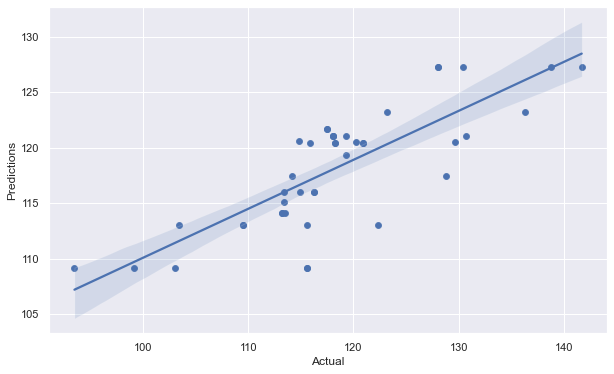

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(data=None, x=y_test, y=predictions)
ax.set(xlabel = 'Actual', ylabel = 'Predictions')
ax2 = sns.regplot(data=None, x=y_test, y=predictions)
plt.show()

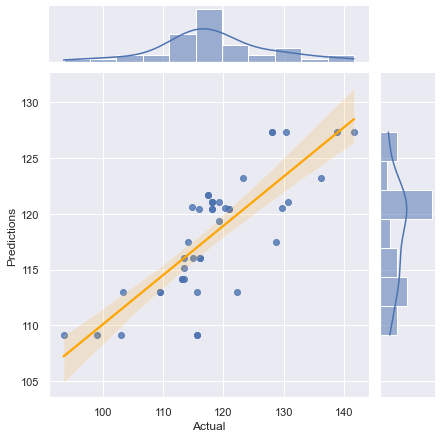

In [33]:
g = sns.jointplot(x=y_test, y=predictions, data=None, kind='reg', joint_kws={'line_kws':{'color':'orange'}})
g.set_axis_labels('Actual', 'Predictions', fontsize=12)

** Model evaluation **

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score: ', r2_score(y_test, predictions))

MAE: 4.497019027484143
MSE: 38.526294765327656
RMSE: 6.206955353901593
r2 score:  0.5727202843360423


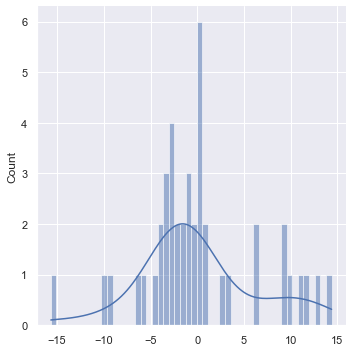

In [27]:
sns.displot(data=None, x=y_test - predictions, kde=True, bins=50)

In [28]:
differences = pd.DataFrame({'Actual Value': y_test, 'Predictions': predictions, 'Difference': y_test - predictions})
differences

,Actual Value,Predictions,Difference
0,122.300,113.018182,9.281818
1,120.200,120.518182,-0.318182
2,136.300,123.218182,13.081818
3,119.300,121.027273,-1.727273
4,114.200,117.445455,-3.245455
5,118.100,121.027273,-2.927273
6,117.500,121.681818,-4.181818
7,130.700,121.027273,9.672727
8,120.900,120.409091,0.490909
9,120.900,120.409091,0.490909


In [30]:
# Visualize independent variables correlation
features = ["Revenue_Value", "Price_Index_Value", "GDP_Value", "Gas_Price_Value", "Carbon_Dioxide_Emission_Value", "Population_Value"]

corr_matrix = df.loc[:,features].corr()
print(corr_matrix)

                               Revenue_Value  Price_Index_Value  GDP_Value  \
Revenue_Value                       1.000000           0.859023   0.838942   
Price_Index_Value                   0.859023           1.000000   0.990656   
GDP_Value                           0.838942           0.990656   1.000000   
Gas_Price_Value                    -0.282172          -0.401395  -0.412298   
Carbon_Dioxide_Emission_Value       0.524051           0.734586   0.769992   
Population_Value                    0.630287           0.633901   0.611783   

                               Gas_Price_Value  Carbon_Dioxide_Emission_Value  \
Revenue_Value                        -0.282172                       0.524051   
Price_Index_Value                    -0.401395                       0.734586   
GDP_Value                            -0.412298                       0.769992   
Gas_Price_Value                       1.000000                      -0.476595   
Carbon_Dioxide_Emission_Value        -0.476595  

<AxesSubplot:>

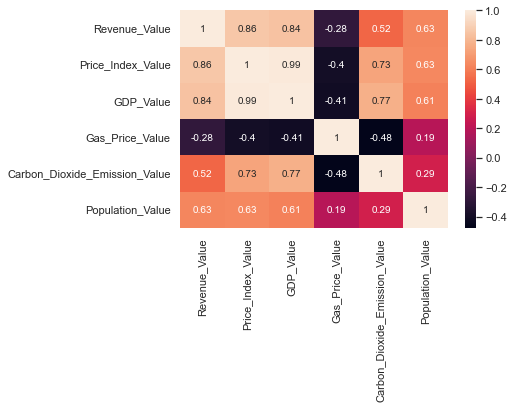

In [31]:
sns.heatmap(corr_matrix, annot=True)